# Student Performance Indicator

### Lifecycle of the Machine Learning Project
1. Understanding problem statement
2. Data Collection
3. Data Checks to perform
4. Exploratory Data Analysis
5. Data Preprocessing
6. Model Training
7. Choose best performing model

### 1) Problem Statement
This project is to understand how the student performance (test scores) is fuelled by other variables such as Gender, EThnicity, Parent's level of education , Lunch and Test Preparation courses

### 2) Data Collection
1. Datasource- https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
2. The dataset consist of 8 columns and 1000 rows

### Import important Libraries

In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV data  as a Dataframe

In [6]:
df=pd.read_csv('./data/stud.csv')

In [7]:
#Top 5 Records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
#Shape of the Dataset
print('The shape of the dataset is {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The shape of the dataset is 1000 rows and 8 columns


### Dataset Information
1. Gender- Sex of Students (Male/Female)
2. race/ethnicity-ethnicity of students-(Group A,B,C,D,E)
3. potential level of education : parents final education -bachelor's degree, master's degree, associate degree,high school
4. lunch: having lunch  before test ( standard or free/reduced)
5. test preparation course:complete ot no complete before test
6. math score
7. reading score
8. writing score

## Data Checks
1. Check missing values
2. Check Duplicates
3. Check Data Types
4. Check unique values in each column
5. Check Statistics of the dataset
6. Check various categories of the dataset

### Check missing values

In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

###### There are no missing values

##### Check for duplicates


In [10]:
df.duplicated().sum()

0

###### There are no duplicates

#### Check for datatypes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Check for Unique values

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### Statistics of the dataset

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights
1. The mean of the different values are closed to each other 
2. The standard deviation of the columns are also close
3. No Outliers in the dataset

### Distinguishing Numerical Features and Categorical Features

In [14]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
cat_features=[feature for feature in df.columns if feature not in numerical_features]

In [15]:
print('We have {} numerical features which are {}'.format(len(numerical_features),numerical_features))
print('We have {} categorical features which are {}'.format(len(cat_features),cat_features))

We have 3 numerical features which are ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features which are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding Column for Total Score and Average

In [16]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3

In [17]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [18]:
math_full=df[df['math_score']==100]['average_score'].count()
reading_full=df[df['reading_score']==100]['average_score'].count()
writing_full=df[df['writing_score']==100]['average_score'].count()
print("The number of people that score maximum marks is {}".format(math_full))
print("The number of people that score maximum marks in reading is {}".format(reading_full))
print("The number of people that score maximum marks in writing is {}".format(writing_full))


The number of people that score maximum marks is 7
The number of people that score maximum marks in reading is 17
The number of people that score maximum marks in writing is 14


In [19]:
math_low=df[df['math_score']<20]['average_score'].count()
reading_low=df[df['reading_score']<20]['average_score'].count()
writing_low=df[df['writing_score']<20]['average_score'].count()
print("The number of people that score lowest marks is {}".format(math_low))
print("The number of people that score lowest marks in reading is {}".format(reading_low))
print("The number of people that score lowest marks in writing is {}".format(writing_low))


The number of people that score lowest marks is 4
The number of people that score lowest marks in reading is 1
The number of people that score lowest marks in writing is 3


##### Insights
1. The student least performed well in Mathematics
2. People performed very well in the reading section

### Visualization

#### To check distribution of the average score

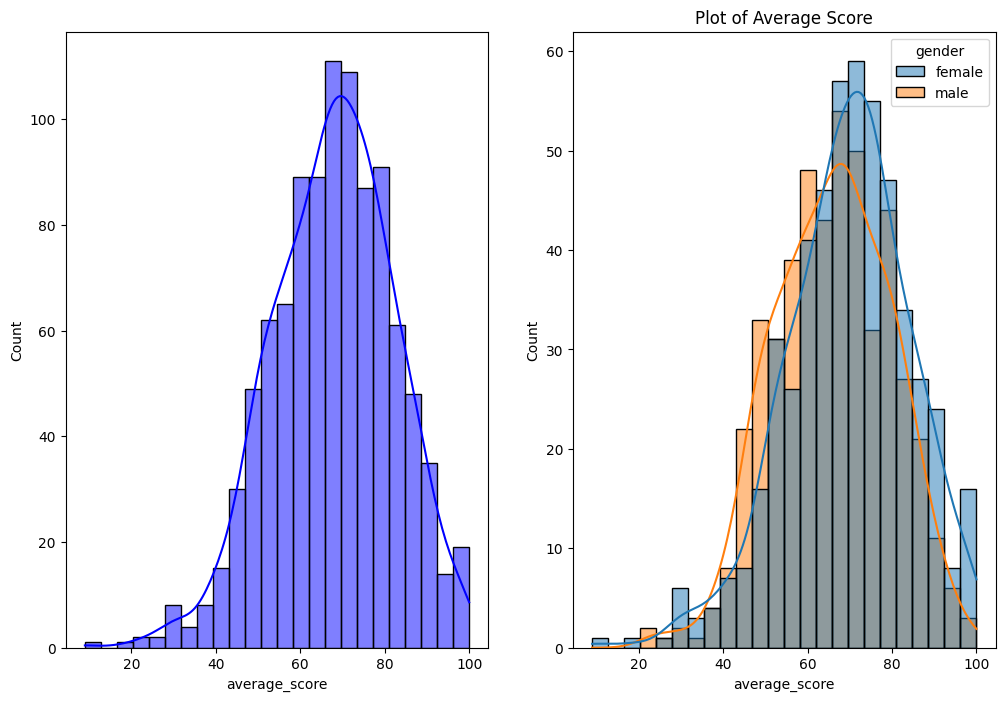

In [20]:
fig,axs=plt.subplots(1,2,figsize=(12,8))
plt.subplot(121)
sns.histplot(data=df,x='average_score',kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.title('Plot of Average Score')
plt.show()

Female students tend to perform better than male students

### Investigate Total Score dependence on Lunch

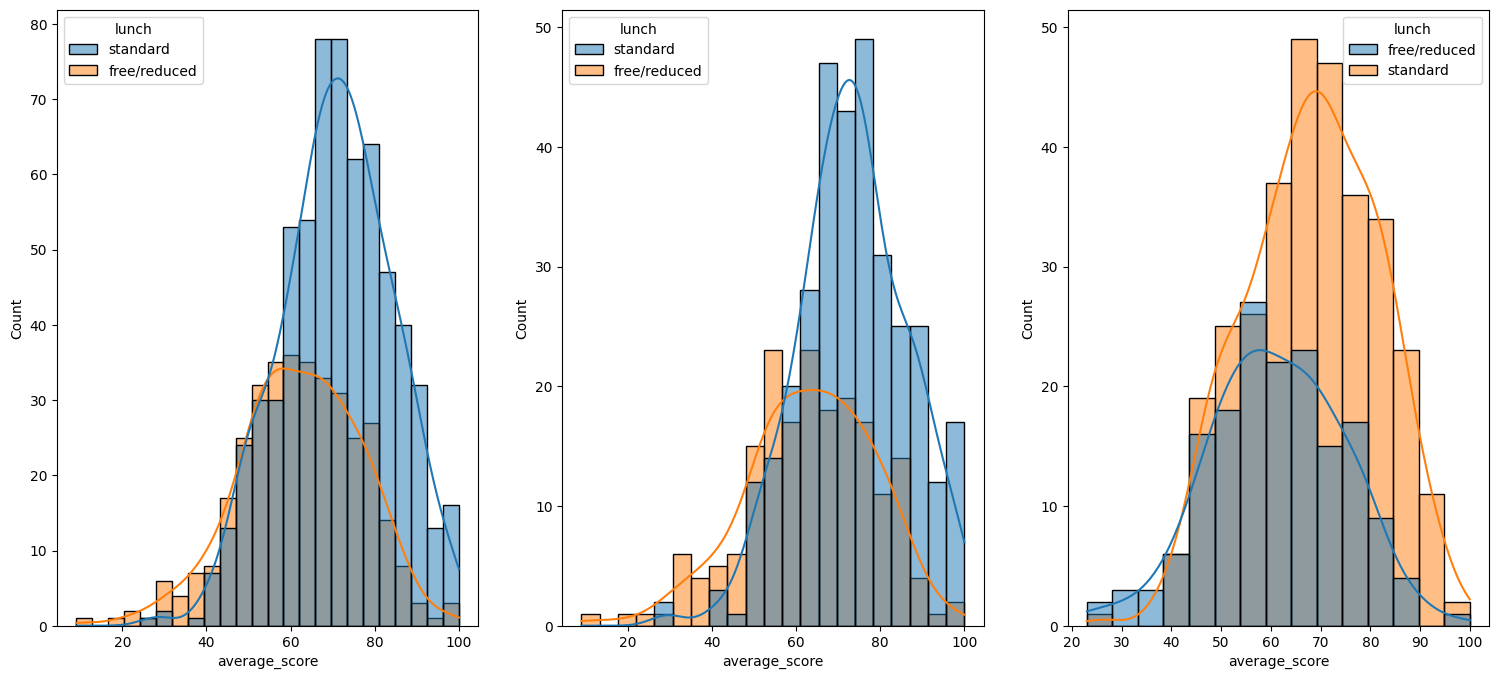

In [21]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

#### Analyzing parental level of Education

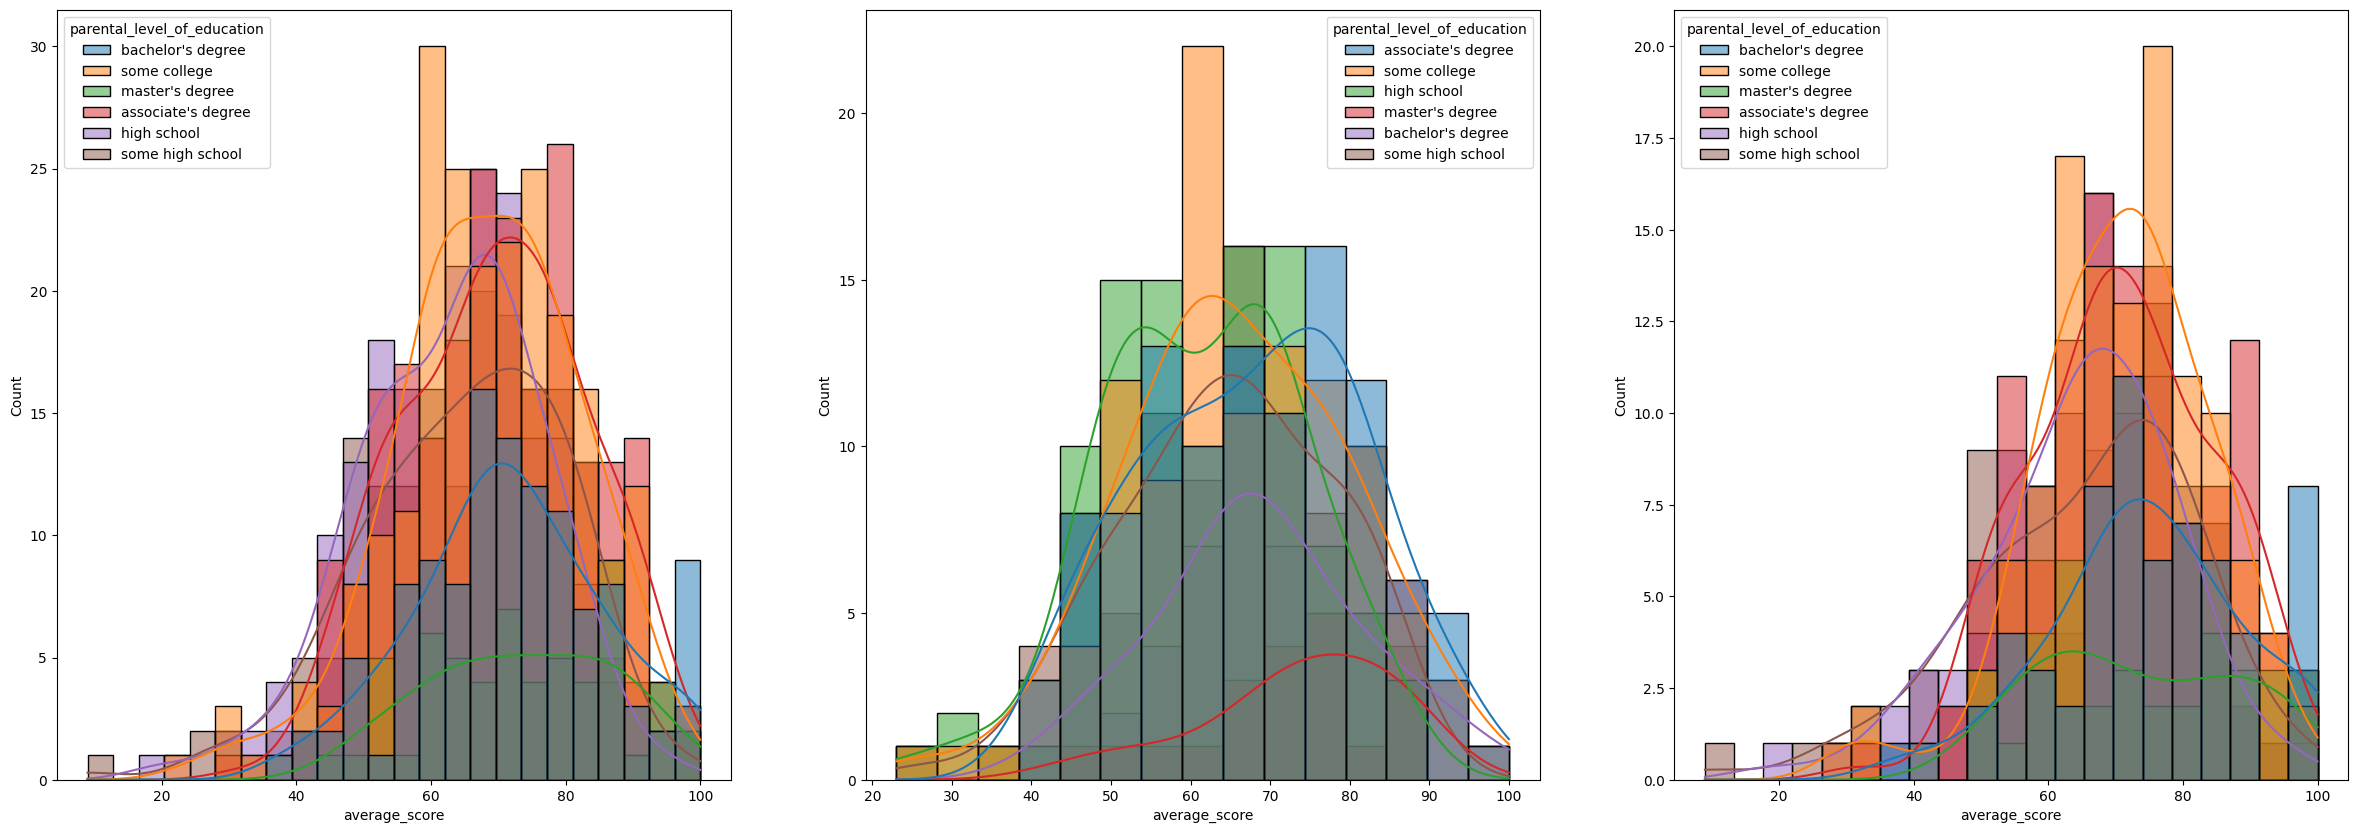

In [22]:
plt.subplots(1,3,figsize=(40,10))
plt.subplot(141)
ax=sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax=sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax=sns.histplot(data=df[df['gender']=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

## Insights
1. Parental level of Education doesnt determine how well the student will perform
2. Most students that their parents earned a masters degree have scores between 40 and 100 (Pass mark)
3. Most Female students whose parents attended college tend to have scores above 70th percentile

### Maximum Scores for Students across the 3 subjects

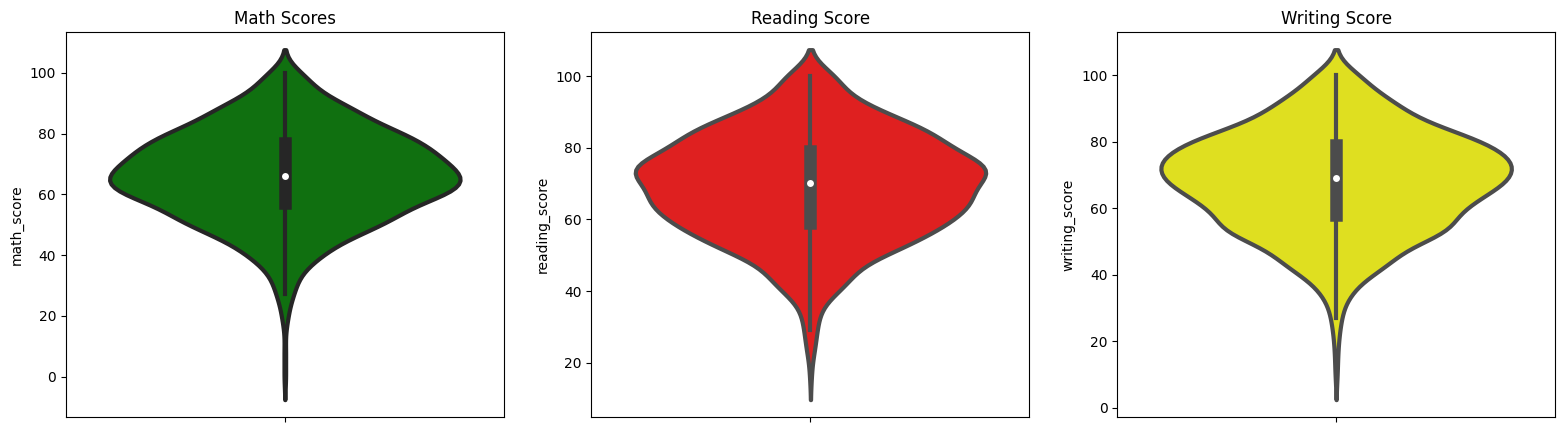

In [23]:
plt.subplots(1,3,figsize=(26,5))
plt.subplot(141)
plt.title('Math Scores')
sns.violinplot(data=df,y='math_score',color='green',linewidth=3)
plt.subplot(142)
plt.title('Reading Score')
sns.violinplot(data=df,y='reading_score',color='red',linewidth=3)
plt.subplot(143)
plt.title('Writing Score')
sns.violinplot(data=df,y='writing_score',color='yellow',linewidth=3)
plt.show()

## Insights
1. From the plot above, we can deduce that in mathematics most people scored between 60 and 80 while in the other two courses majority scored between 50 and 80. Furthermore, we can deduce that less people scored less than 20 in both reading and writing than in mathematics

## Multivariate Analysis

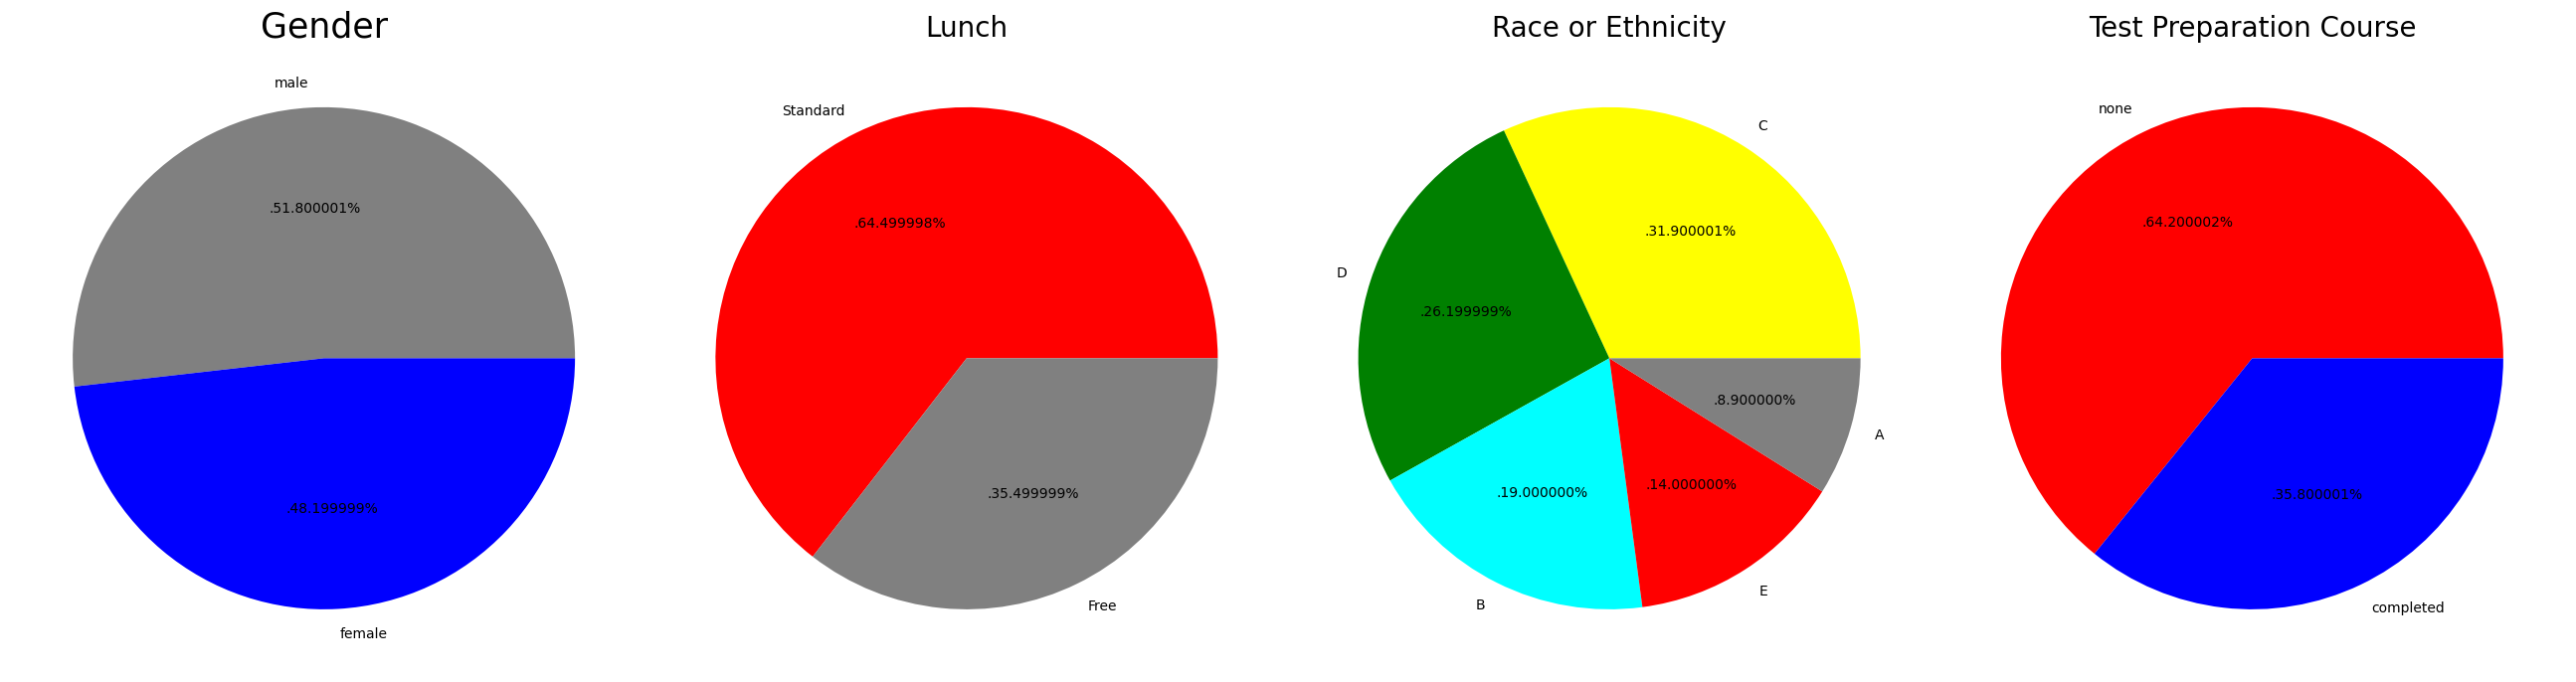

In [42]:
plt.rcParams['figure.figsize']=(26,13)
plt.subplot(1,4,1)
size=df['gender'].value_counts() #To produce the total number of each category
labels=['male','female']
color=['grey','blue']

plt.pie(x=size,colors=color,labels=labels,autopct='.%2f%%') #plotting a pie chat of both gender
plt.title('Gender',fontsize=25)
plt.axis('off')

#Plotting the Lunch Data
plt.subplot(1,4,2)
size=df['lunch'].value_counts() #To produce the total number of each category
labels=['Standard','Free']
color=['Red','Grey']

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%') #plotting a pie chat of both Lunch mode
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,4,3)
size=df['race_ethnicity'].value_counts() #plotting a pie chat of for different ethnicity groups
labels=['C','D','B','E','A']
color=['yellow','green','cyan','red','grey']
plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('Race or Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,4,4)
size=df['test_preparation_course'].value_counts() #plotting a pie chat of for different ethnicity groups
labels=['none','completed']
color=['red','blue']
plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('Test Preparation Course',fontsize=20)

plt.tight_layout()
plt.grid()
plt.show()

## Insights
1. We almost have a balanced number of male and female
2. We have more of students who survive on standard lunch
3. The ethnicity with the highest number is Group C with Group D second in line with a differnece of less than  5%
4. Most students didn't attend a Test preparation Course

### Feature Wise Visualization


#### Gender Column
1. Distribution of Gender Column
2. Does gender affect student performance?


#### Understanding the Distibution of Gender

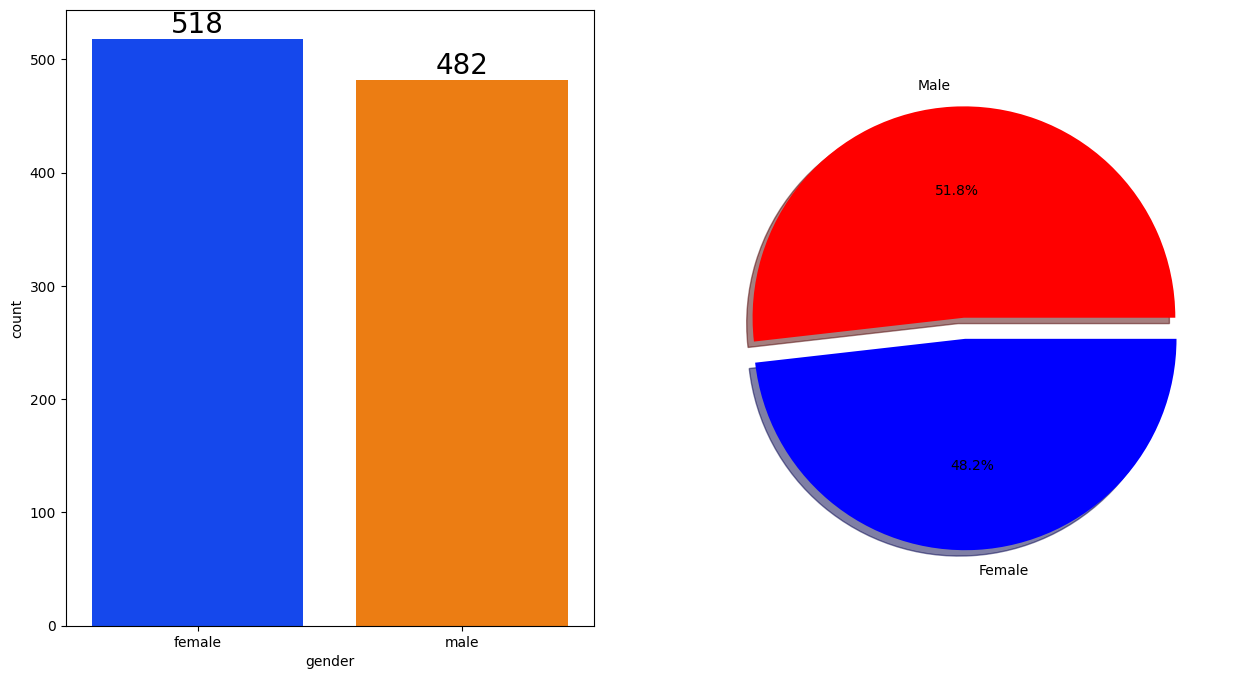

In [44]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.countplot(data=df,x='gender',palette='bright',ax=ax[0],saturation=0.85)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
size=df['gender'].value_counts()
label=['Male','Female']
color=['Red','Blue']
plt.pie(x=size,labels=label,colors=color,explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()


### Insights
1. Gender has near to perfect balanced data with Male (52%) and Female (48%)

### Bivariate Analysis
##### Does Gender have any impact on Student's performance

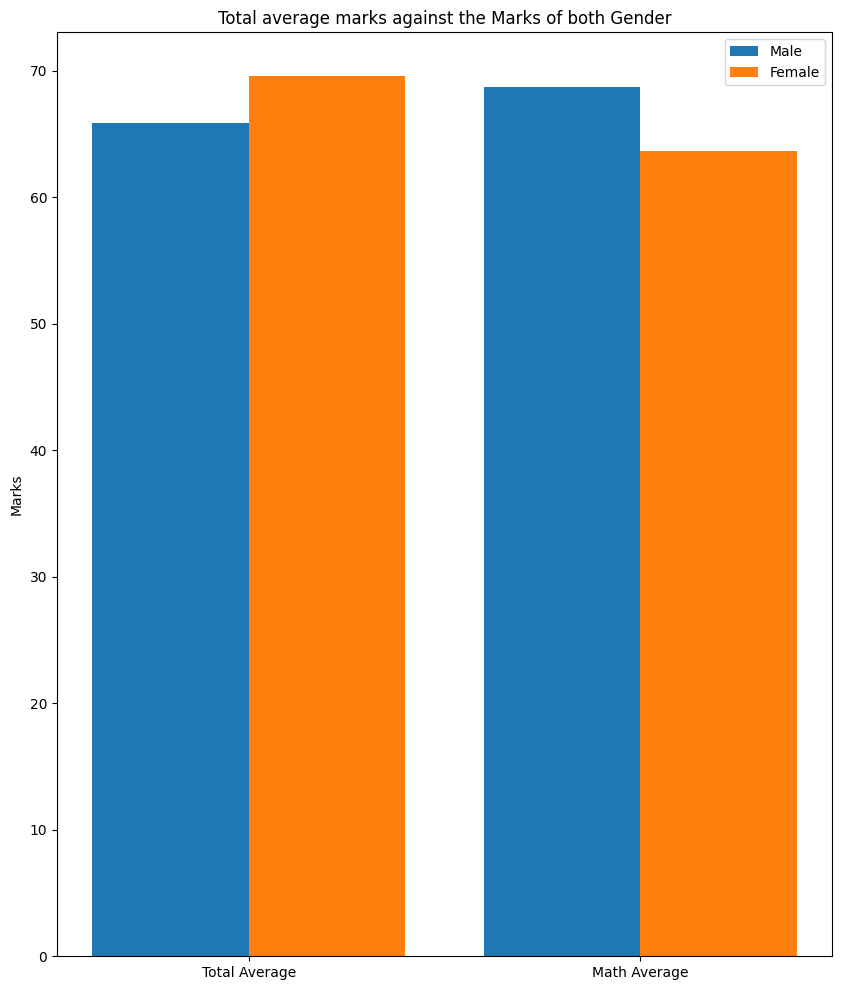

In [49]:
#For Mathematics
grouped_gender=df.groupby('gender').mean()
plt.figure(figsize=(10,12))
X=['Total Average','Math Average']
female_scores=[grouped_gender['average_score'][0],grouped_gender['math_score'][0]]
male_scores=[grouped_gender['average_score'][1],grouped_gender['math_score'][1]]
X_axis=np.arange(len(X))
plt.bar(X_axis - 0.2, male_scores,0.4,label='Male')
plt.bar(X_axis + 0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel('Marks')
plt.title('Total average marks against the Marks of both Gender')
plt.legend()
plt.show()

### Insights
1. Female perform better accross the three subjects compared to the male students
2. The guys performed better in mathematics compared to the ladies

#### Analysis on Reading Scores with Gender

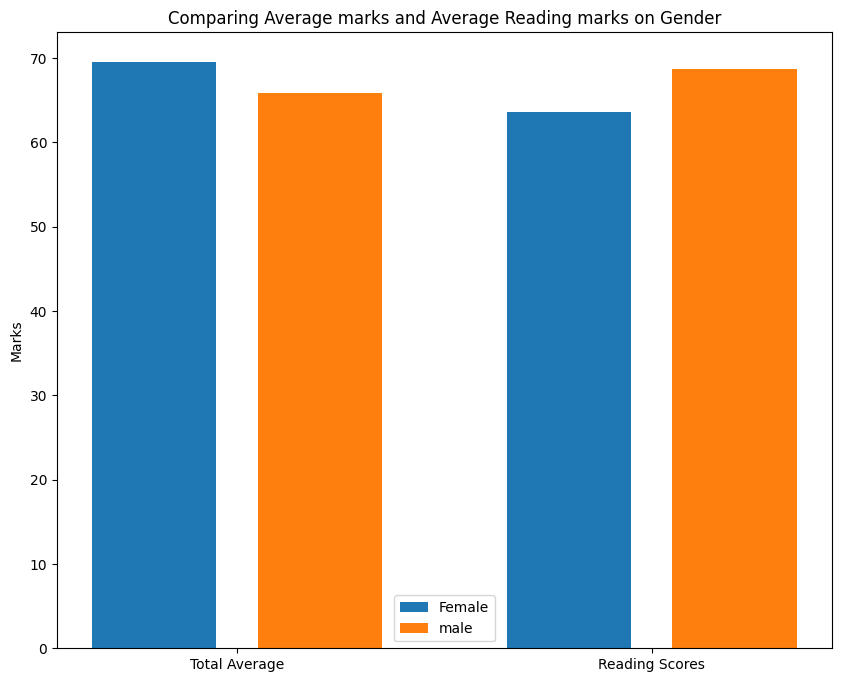

In [51]:
plt.figure(figsize=(10,8))
X=['Total Average','Reading Scores']
male_score=[grouped_gender['average_score'][1],grouped_gender['reading_score'][1]]
female_score=[grouped_gender['average_score'][0],grouped_gender['reading_score'][0]]
X_axis=np.arange(len(X))
plt.bar(X_axis-0.2, female_scores, 0.3,label='Female')
plt.bar(X_axis +0.2,male_scores,0.3,label='male')
plt.xticks(X_axis,X)
plt.title('Comparing Average marks and Average Reading marks on Gender')
plt.ylabel('Marks')
plt.legend()
plt.show()

### Insights
1. Male students performed better in reading compared to the female students

### Race Ethnicity Column

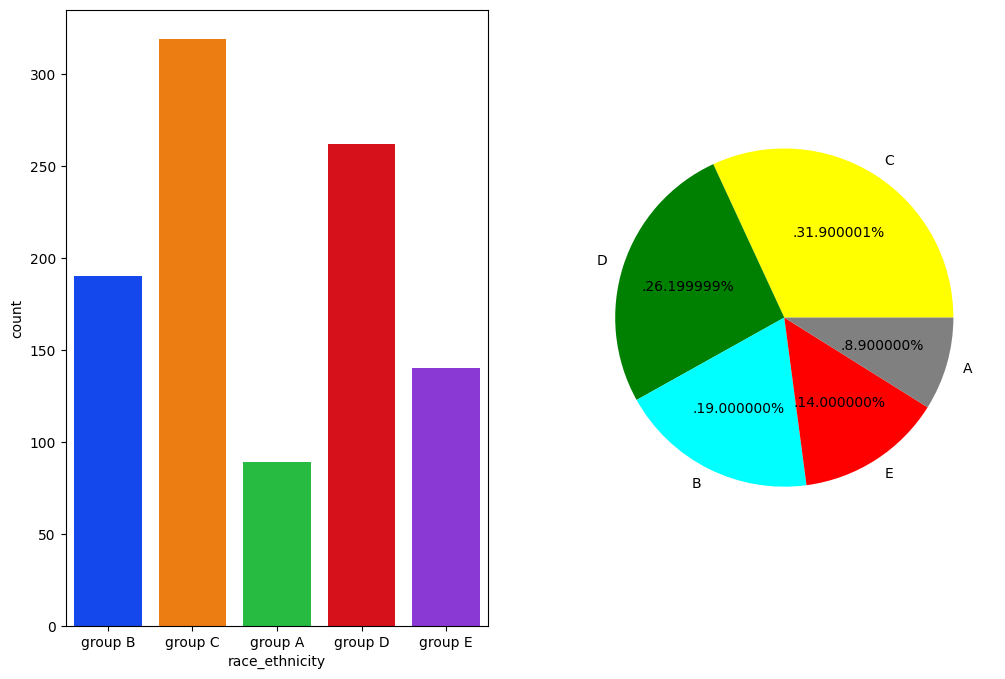

In [54]:
#Check for Race and Ethnicity distribution
fig,ax=plt.subplots(1,2,figsize=(12,8))
sns.countplot(data=df,x='race_ethnicity',palette='bright',ax=ax[0],saturation=0.85)
for containers in ax[0].containers:
    ax[0].bar_label(container,color='red',size=20)
size=df['race_ethnicity'].value_counts()
labels=['C','D','B','E','A']
color=['yellow','green','cyan','red','grey']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.show()

### BIVARIATE ANALYSIS
#### Impact of Ethnicity on Student Performance

Text(0.5, 1.0, 'Writing Score')

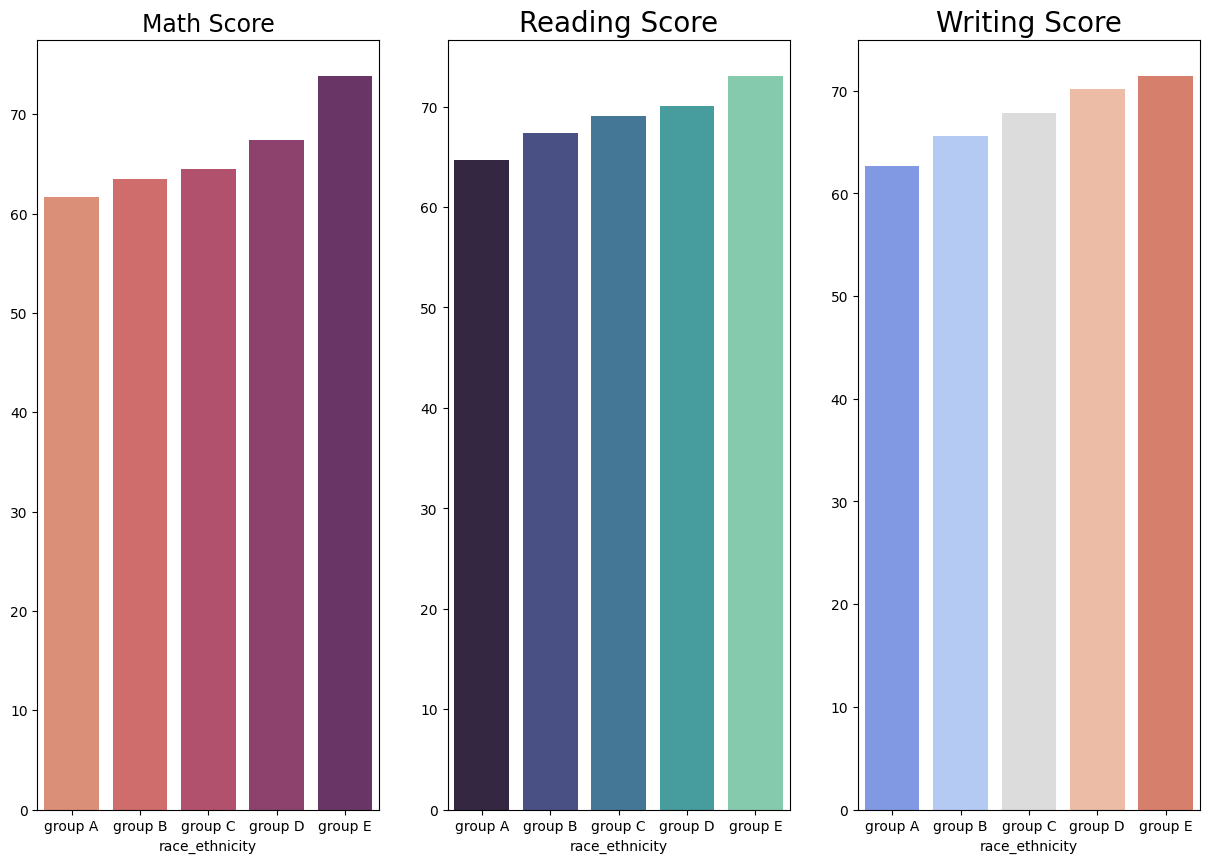

In [71]:
grouped_data_race=df.groupby('race_ethnicity')
fig,ax=plt.subplots(1,3,figsize=(15,10))
x_axis=grouped_data_race['math_score'].mean().index
y_axis=grouped_data_race['math_score'].mean().values
sns.barplot(data=df,x=x_axis,y=y_axis,palette='flare',ax=ax[0])
ax[0].set_title('Math Score',size=17)
for containers in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

x_axis=grouped_data_race['reading_score'].mean().index
y_axis=grouped_data_race['reading_score'].mean().values
sns.barplot(data=df,x=x_axis,y=y_axis,palette='mako',ax=ax[1])
ax[1].set_title('Reading Score',size=20)
for containers in ax[1].containers:
    ax[1].bar_label(container,color='blue',size=15)

x_axis=grouped_data_race['writing_score'].mean().index
y_axis=grouped_data_race['writing_score'].mean().values
sns.barplot(data=df,x=x_axis,y=y_axis,palette='coolwarm',ax=ax[2])
ax[2].set_title('Writing Score',size=20)


### Insights
1. Students from the Group E ethnicity perform better across all three subjects
2. group A students scored lowest across the different subject

### Checking Outliers


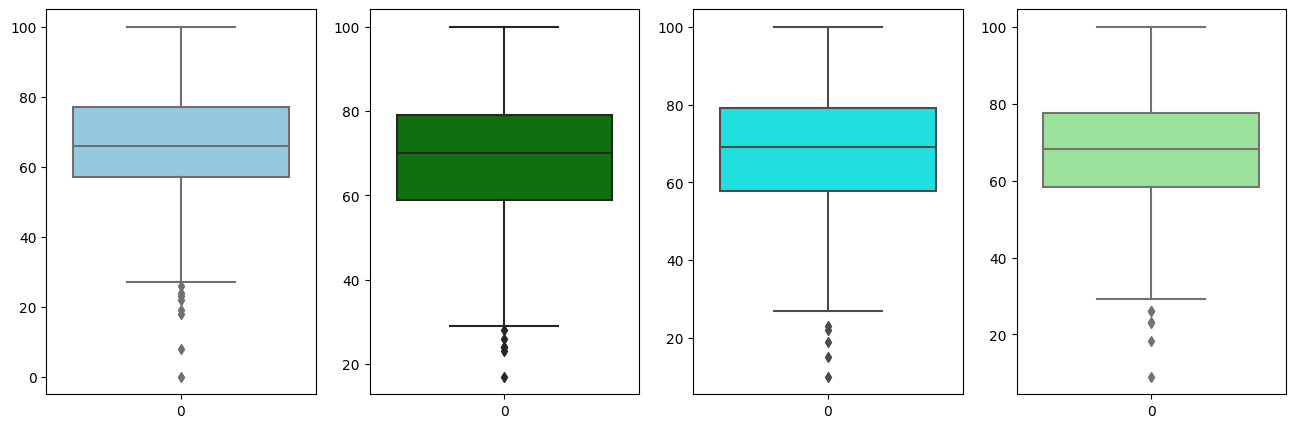

In [79]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='green')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='cyan')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()





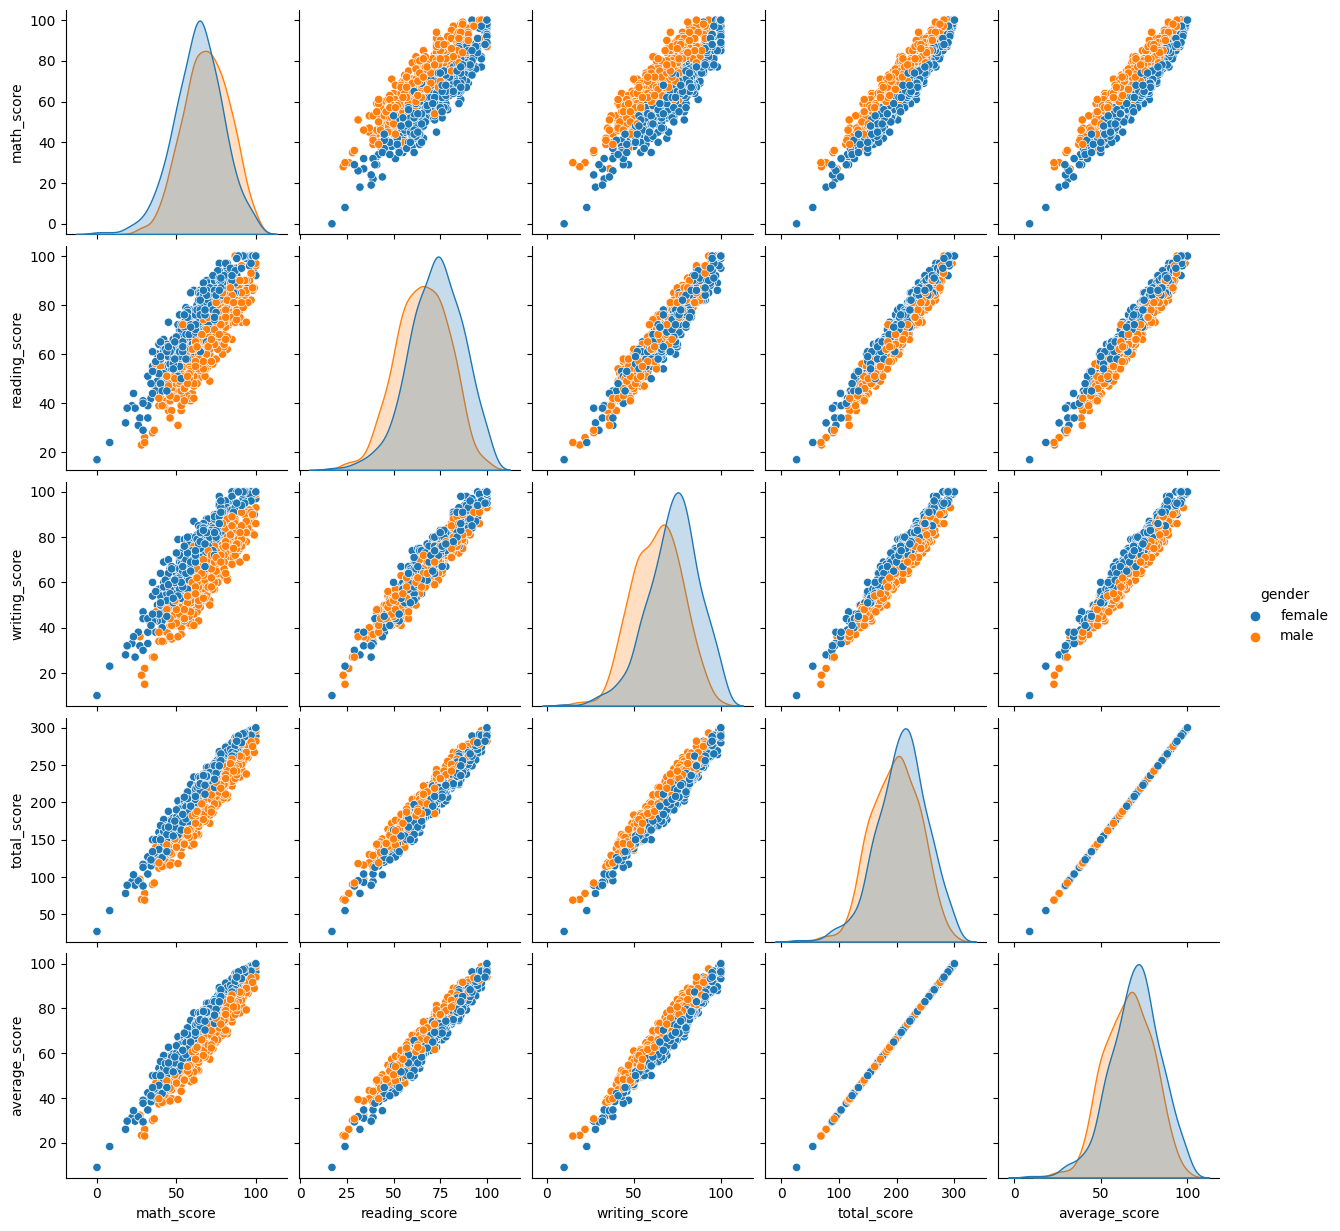

In [80]:
sns.pairplot(df,hue='gender')

### Insights
1. There is a linear relationship between the different features

### Conclusions
1. Students performance is highle dependent on lunch, race and parents level of education
2. Female are the top students
3. Student's excellence is not related to putting in for a test preparation course